### Importing Libraries & Data

In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

In [2]:
# Load tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mukul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Load Data
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\mukul\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [4]:
from nltk.corpus import gutenberg

In [5]:
len(gutenberg.fileids())

18

In [6]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

### Tokenize the text

In [7]:
gberg_sent_tokens = sent_tokenize(gutenberg.raw())
gberg_sent_tokens[0]

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.'

In [8]:
word_tokenize(gberg_sent_tokens[0])

['[',
 'Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 ']',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty-one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.']

In [9]:
gberg_sents = gutenberg.sents()
gberg_sents[0:3]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I']]

In [10]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [11]:
gutenberg.words()

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [12]:
len(gutenberg.words())

2621613

### Word2vec model

In [13]:
model = Word2Vec(sentences=gberg_sents, vector_size=64, sg=1, window=10, min_count=5,seed=42, workers=8)

In [15]:
model.save('raw_gutenberg_model.w2v')

### Exploring the Model

In [16]:
model = gensim.models.Word2Vec.load('raw_gutenberg_model.w2v')

In [17]:
model.wv['man']

array([ 0.07072512, -0.48694235,  0.42112577, -0.1476217 , -0.00579272,
       -0.12223714, -0.4663704 , -0.31522816, -0.29878092,  0.15691495,
       -0.13205121, -0.12912461,  0.4365057 ,  0.57211834,  0.17758764,
        0.32157528, -0.21907578,  0.30717385, -0.25998187, -0.05644085,
       -0.08274265, -0.32943088, -0.3581543 ,  0.1546594 , -0.35771635,
        0.2408086 , -0.6059486 ,  0.25911692, -0.12929998,  0.16414413,
        0.28411388, -0.1724251 ,  0.08732793,  0.09280004, -0.05921313,
        0.41391096,  0.516336  ,  0.1017874 ,  0.3576297 ,  0.03491831,
       -0.20438257, -0.43953356,  0.00994913,  0.11234913, -0.54562175,
        0.2828746 , -0.11785099, -0.40857258, -0.6798244 , -0.42145595,
        0.00632719, -0.203524  , -0.09207617, -0.05201332, -0.26932725,
        0.12255684, -0.00984169,  0.03945295,  0.27863458, -0.5813632 ,
        0.35991994, -0.48754364, -0.02065714,  0.44761103], dtype=float32)

In [18]:
len(model.wv['man'])

64

In [19]:
model.wv.most_similar('man')

[('he', 0.7047455906867981),
 ('philosopher', 0.7013028860092163),
 ('fairy', 0.6992238163948059),
 ('policeman', 0.6823346018791199),
 ('gentleman', 0.6814988851547241),
 ('one', 0.6813311576843262),
 ('figure', 0.6768466830253601),
 ('farmer', 0.6747316122055054),
 ('clown', 0.6726551651954651),
 ('fellow', 0.6710351705551147)]

In [20]:
model.wv.doesnt_match("mother father daughter dog".split())

'dog'

In [21]:
model.wv.similarity('father', 'dog')

0.44392025

In [22]:
model.wv.most_similar(positive=['father', 'woman'], negative='man')

[('husband', 0.3663536310195923),
 ('sister', 0.35432592034339905),
 ('wife', 0.335672527551651),
 ('Rachel', 0.32634326815605164),
 ('Rebekah', 0.3144474923610687),
 ('daughter', 0.3122771680355072),
 ('younger', 0.30403754115104675),
 ('brother', 0.3013654053211212),
 ('loved', 0.29444023966789246),
 ('Lot', 0.29343509674072266)]

### Reducing Word Vector Dimentionality Uding t-SNE

In [23]:
len(model.wv) #vocab size of the model

17011

In [24]:
X = model.wv[model.wv.key_to_index]

In [25]:
tsne = TSNE(n_components=2, n_iter=1000)

In [26]:
X_2d = tsne.fit_transform(X)

In [27]:
X_2d[0:5]

array([[ 10.467556, -36.553158],
       [ 10.847267, -37.10075 ],
       [ 10.735015, -36.921326],
       [ 10.380649, -36.796753],
       [ 11.117384, -37.00295 ]], dtype=float32)

In [28]:
coords_df = pd.DataFrame(X_2d, columns=['x', 'y'])
coords_df['token'] = model.wv.key_to_index

In [29]:
coords_df.head(10)

,x,y,token
0,10.467556,-36.553158,","
1,10.847267,-37.100750,the
2,10.735015,-36.921326,and
3,10.380649,-36.796753,.
4,11.117384,-37.002949,of
5,-17.809841,49.453949,:
6,10.459656,-36.873569,to
7,10.053569,-38.292416,a
8,11.462561,-36.988369,in
9,-33.605442,-5.263953,I


In [30]:
coords_df.to_csv('raw_gutenberg_tsne.csv', index=False)

### 2D Visualization

In [31]:
coords_df = pd.read_csv('raw_gutenberg_tsne.csv')

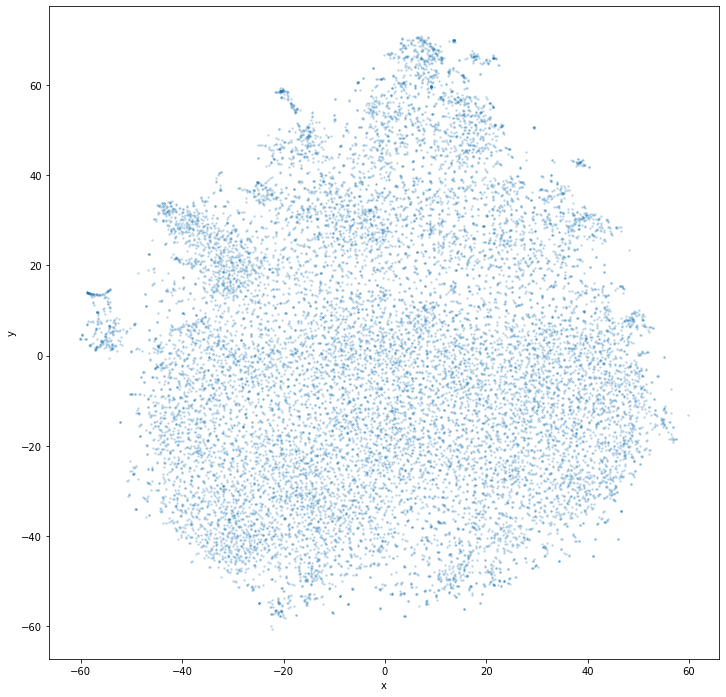

In [32]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12, 12), marker='.', s=10, alpha=0.2)

In [33]:
output_notebook()

Loading BokehJS ...

In [34]:
subset_df = coords_df.sample(n=1000)

In [35]:
p = figure(plot_width=600, plot_height=600)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [36]:
show(p)